<a href="https://colab.research.google.com/github/iilnreddy/ccdetect/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn import preprocessing

In [ ]:
import kagglehub

# Download latest version
#path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

#print("Path to dataset files:", path)

100%|██████████| 66.0M/66.0M [00:00<00:00, 206MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !cp /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3/creditcard.csv /content/drive/MyDrive/CAPStone/

# Exploratory Data Analysis [EDA]

In [3]:
#df = pd.read_csv('/root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3/creditcard.csv')
df = pd.read_csv('/content/drive/MyDrive/CAPStone/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Checking for the missing value in columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Display basic information about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

In [8]:
#observe the different feature type present in the data
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Here we will observe the distribution of our classes
#### Check class distribution

In [9]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [10]:
print(classes)
print(normal_share,fraud_share)

Class
0    284315
1       492
Name: count, dtype: int64
99.82725143693798 0.1727485630620034


# Observation
- The data set has Total Number of Transactions : 284807
- with Non-Fraudulent Transactions:  284315 (99.83%)
- Fraudulent Transactions: 492  (0.17%)

* The dataset has very high class imbalance. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.

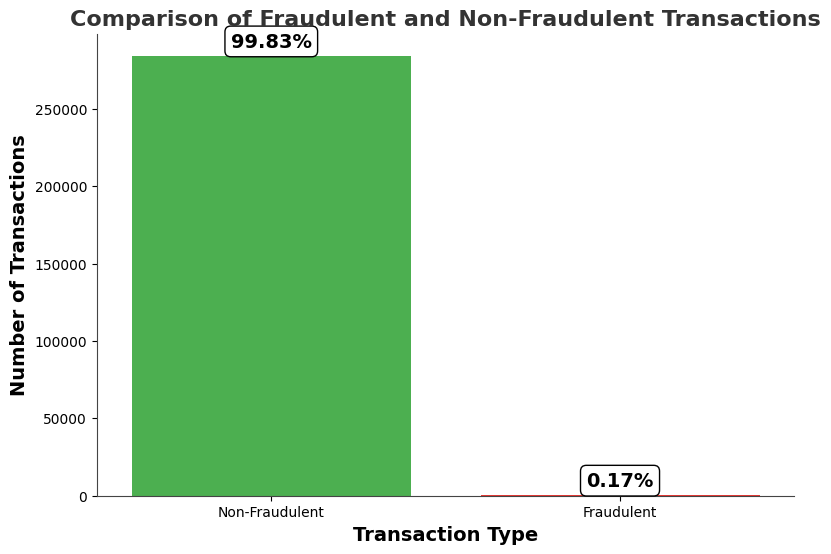

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for plotting
labels = ['Non-Fraudulent', 'Fraudulent']
values = [classes[0], classes[1]]
percentages = [normal_share, fraud_share]

# Create a DataFrame for seaborn
group_df = pd.DataFrame({'Transaction Type': labels, 'Count': values})

# Define custom colors
colors = ['#4CAF50', '#E53935']  # Green for non-fraudulent, red for fraudulent

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(9, 6))
sns.barplot(data=group_df, x="Transaction Type", y="Count", hue="Transaction Type", dodge=False, ax=ax1, legend=False)

# Manually set bar colors
for bar, color in zip(ax1.patches, colors):
    bar.set_facecolor(color)

# Add text annotations for percentage
for i, v in enumerate(values):
    ax1.text(i, v + max(values) * 0.02, f'{percentages[i]:.2f}%',
             ha='center', fontsize=14, fontweight='bold', color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Customize labels and title
ax1.set_ylabel("Number of Transactions", fontsize=14, fontweight='bold', color='black')
ax1.set_xlabel("Transaction Type", fontsize=14, fontweight='bold', color='black')
ax1.set_title("Comparison of Fraudulent and Non-Fraudulent Transactions", fontsize=16, fontweight='bold', color='#333')

# Remove unnecessary gridlines and customize axis styles
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('#444')
ax1.spines['bottom'].set_color('#444')

# Show plot
plt.show()


In [34]:
print(df.columns)
# creating fradulant dataframes
data_fraud = df[df['Class'] == 1]

# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


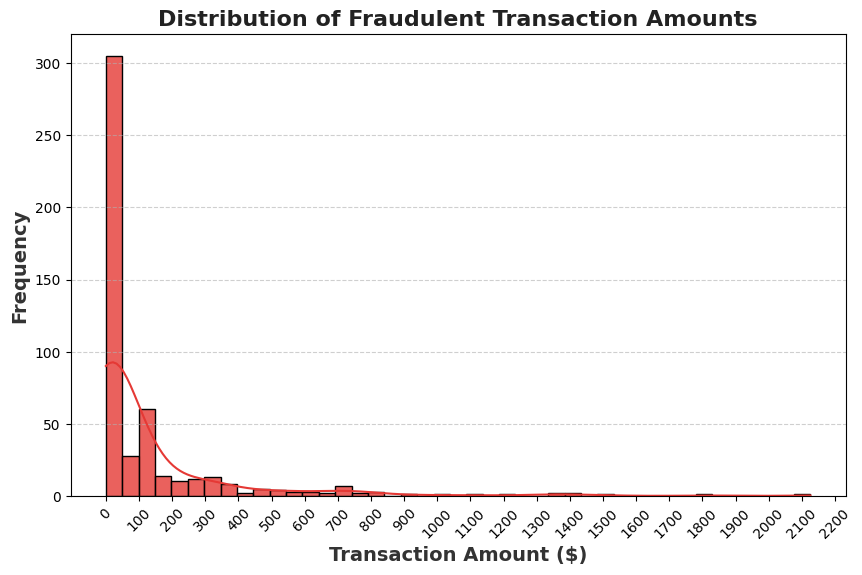

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set figure size
plt.figure(figsize=(10, 6))

# Create histogram with KDE
sns.histplot(data_fraud['Amount'], binwidth=50, kde=True, color='#E53935', edgecolor='black', alpha=0.8)

# Labels and title
plt.xlabel('Transaction Amount ($)', fontsize=14, fontweight='bold', color='#333')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='#333')
plt.title('Distribution of Fraudulent Transaction Amounts', fontsize=16, fontweight='bold', color='#222')

# Adjust x-ticks dynamically
max_amount = int(data_fraud['Amount'].max())
plt.xticks(np.arange(0, max_amount + 100, step=100), rotation=45)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Optional: Use a log scale if the distribution is highly skewed
# plt.yscale('log')

# Show plot
plt.show()


##Observation:
### Most Fraud transactions occur at low $ amounts.

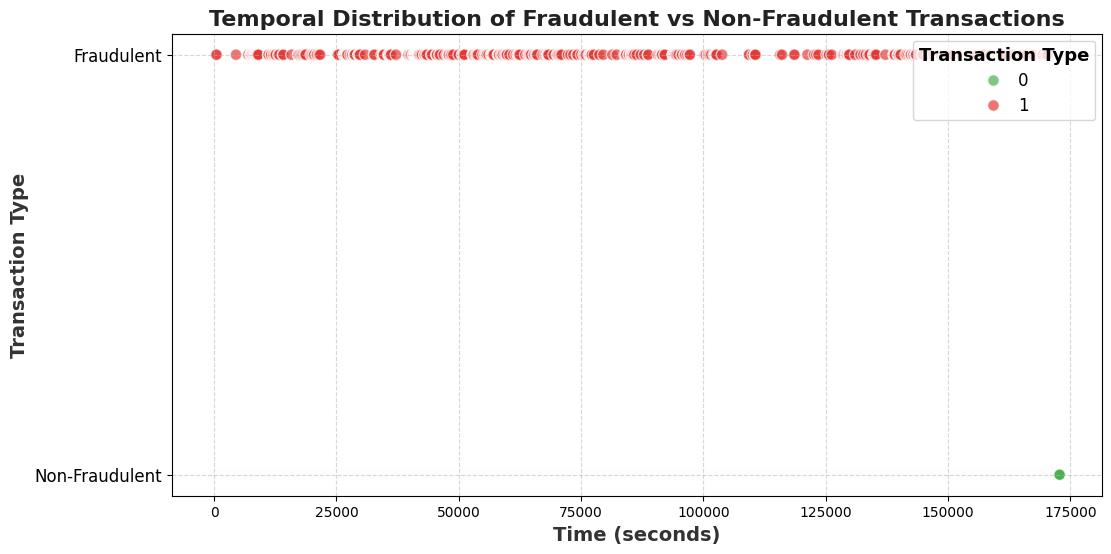

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure
plt.figure(figsize=(12, 6))

# Scatter plot with enhanced visuals
sns.scatterplot(
    data=df, x='Time', y='Class', hue='Class',
    alpha=0.7, s=70, linewidth=1,
    palette={0: '#4CAF50', 1: '#E53935'}  # Green for non-fraudulent, red for fraudulent
)

# Labels and title
plt.xlabel("Time (seconds)", fontsize=14, fontweight='bold', color='#333')
plt.ylabel("Transaction Type", fontsize=14, fontweight='bold', color='#333')
plt.title("Temporal Distribution of Fraudulent vs Non-Fraudulent Transactions", fontsize=16, fontweight='bold', color='#222')

# Customize legend
legend = plt.legend(title="Transaction Type", loc='upper right')
plt.setp(legend.get_title(), fontsize=13, fontweight='bold')
plt.setp(legend.get_texts(), fontsize=12)

# Improve y-axis ticks for readability
plt.yticks([0, 1], ['Non-Fraudulent', 'Fraudulent'], fontsize=12)

# Add light gridlines for better readability
plt.grid(axis='both', linestyle='--', alpha=0.5)

# Show plot
plt.show()


In [ ]:
# Drop unnecessary columns

In [4]:
Delta_Time = pd.to_timedelta(df['Time'], unit='s')
#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

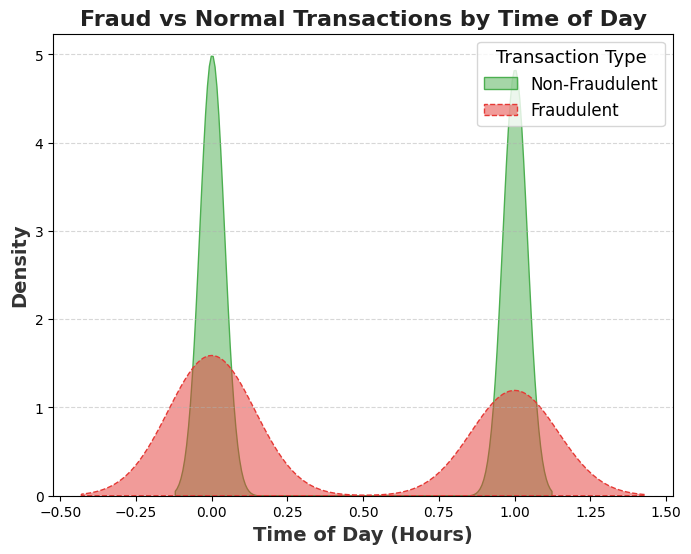

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 6))

# KDE plots for Non-Fraudulent and Fraudulent transactions
sns.kdeplot(df[df['Class'] == 0]["Time_Day"], label="Non-Fraudulent", color="#4CAF50", fill=True, alpha=0.5)
sns.kdeplot(df[df['Class'] == 1]["Time_Day"], label="Fraudulent", color="#E53935", fill=True, alpha=0.5, linestyle="--")

# Labels and title
plt.xlabel("Time of Day (Hours)", fontsize=14, fontweight='bold', color='#333')
plt.ylabel("Density", fontsize=14, fontweight='bold', color='#333')
plt.title("Fraud vs Normal Transactions by Time of Day", fontsize=16, fontweight='bold', color='#222')

# Customize legend
plt.legend(title="Transaction Type", fontsize=12, title_fontsize=13, loc="upper right")

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()


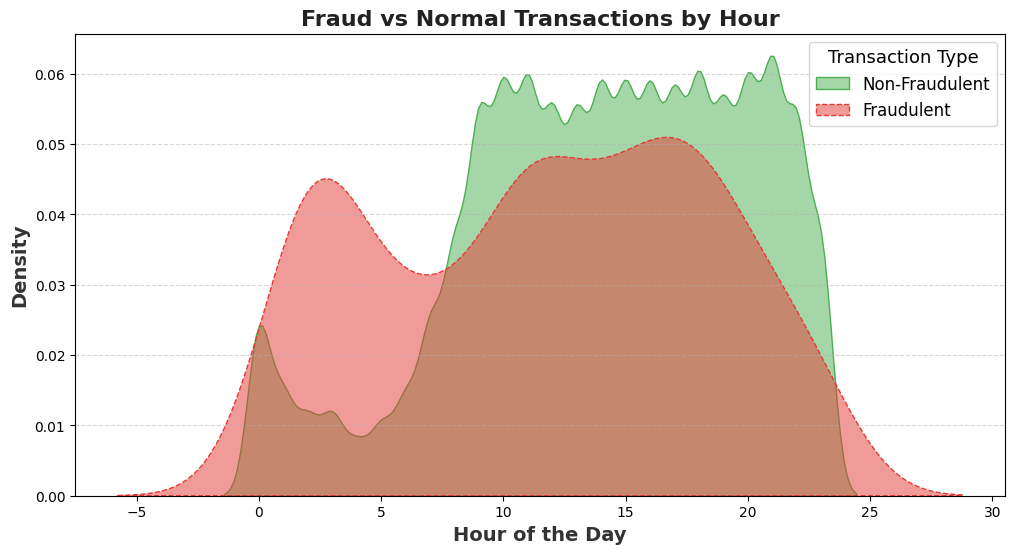

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# KDE plot for Non-Fraudulent and Fraudulent transactions
sns.kdeplot(df[df['Class'] == 0]["Time_Hour"], label="Non-Fraudulent", color="#4CAF50", fill=True, alpha=0.5)
sns.kdeplot(df[df['Class'] == 1]["Time_Hour"], label="Fraudulent", color="#E53935", fill=True, alpha=0.5, linestyle="--")

# Labels and title
plt.xlabel("Hour of the Day", fontsize=14, fontweight='bold', color='#333')
plt.ylabel("Density", fontsize=14, fontweight='bold', color='#333')
plt.title("Fraud vs Normal Transactions by Hour", fontsize=16, fontweight='bold', color='#222')

# Customize legend
plt.legend(title="Transaction Type", fontsize=12, title_fontsize=13, loc="upper right")

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()


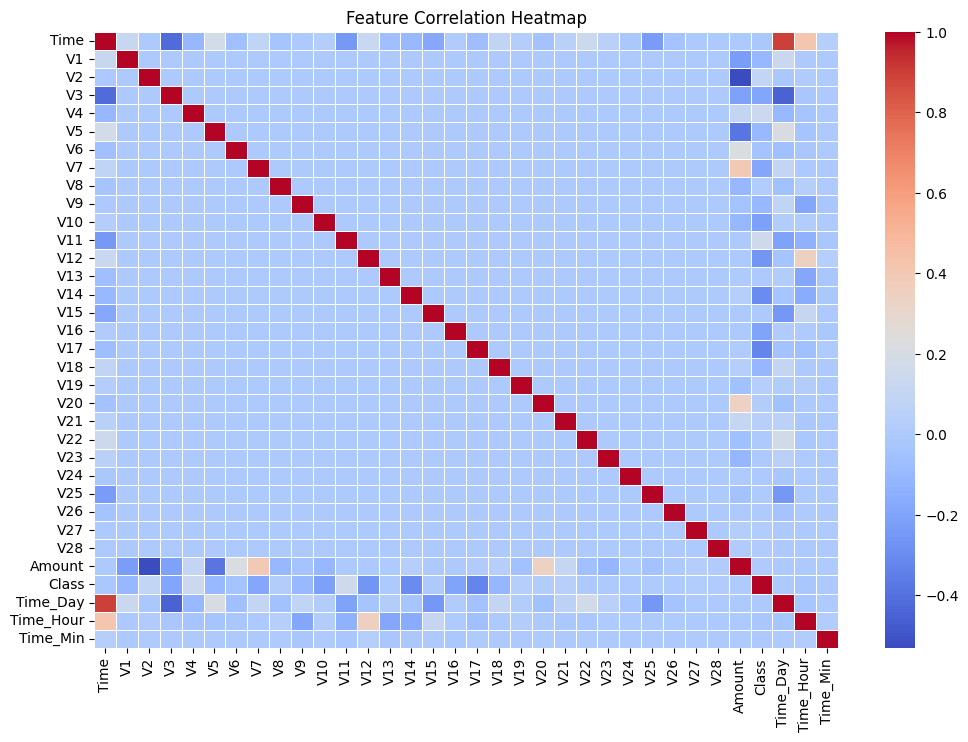

In [48]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


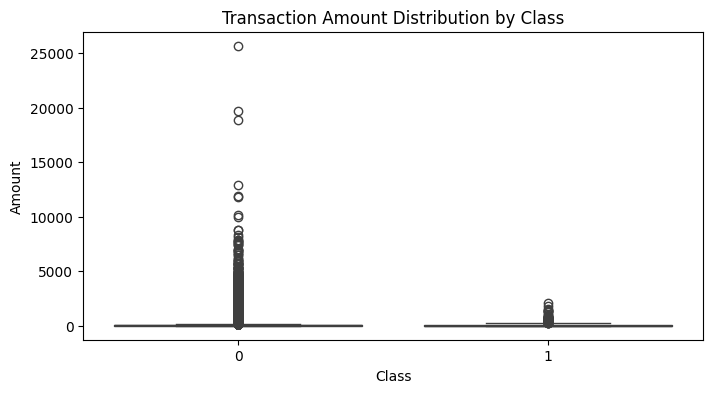

In [49]:
# Boxplot for Amount feature
plt.figure(figsize=(8, 4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amount Distribution by Class")
plt.show()

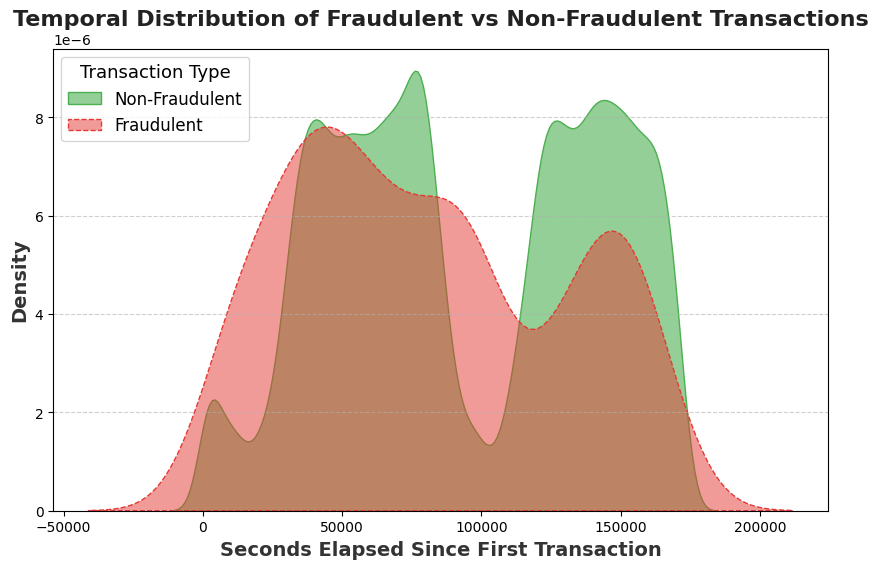

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
# KDE plot for Time feature
# Creating fraudulent and non-fraudulent dataframes
data_fraud = df[df['Class'] == 1]
data_non_fraud = df[df['Class'] == 0]

# Set figure size
plt.figure(figsize=(10, 6))

# KDE plot for both classes
sns.kdeplot(data_non_fraud['Time'], label='Non-Fraudulent', fill=True, color='#4CAF50', alpha=0.6)
sns.kdeplot(data_fraud['Time'], label='Fraudulent', fill=True, color='#E53935', alpha=0.5, linestyle="--")

# Labels and title
plt.xlabel('Seconds Elapsed Since First Transaction', fontsize=14, fontweight='bold', color='#333')
plt.ylabel('Density', fontsize=14, fontweight='bold', color='#333')
plt.title('Temporal Distribution of Fraudulent vs Non-Fraudulent Transactions', fontsize=16, fontweight='bold', color='#222')

# Customize legend
plt.legend(loc='best', fontsize=12, title="Transaction Type", title_fontsize=13)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.show()


In [5]:

print(cols)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


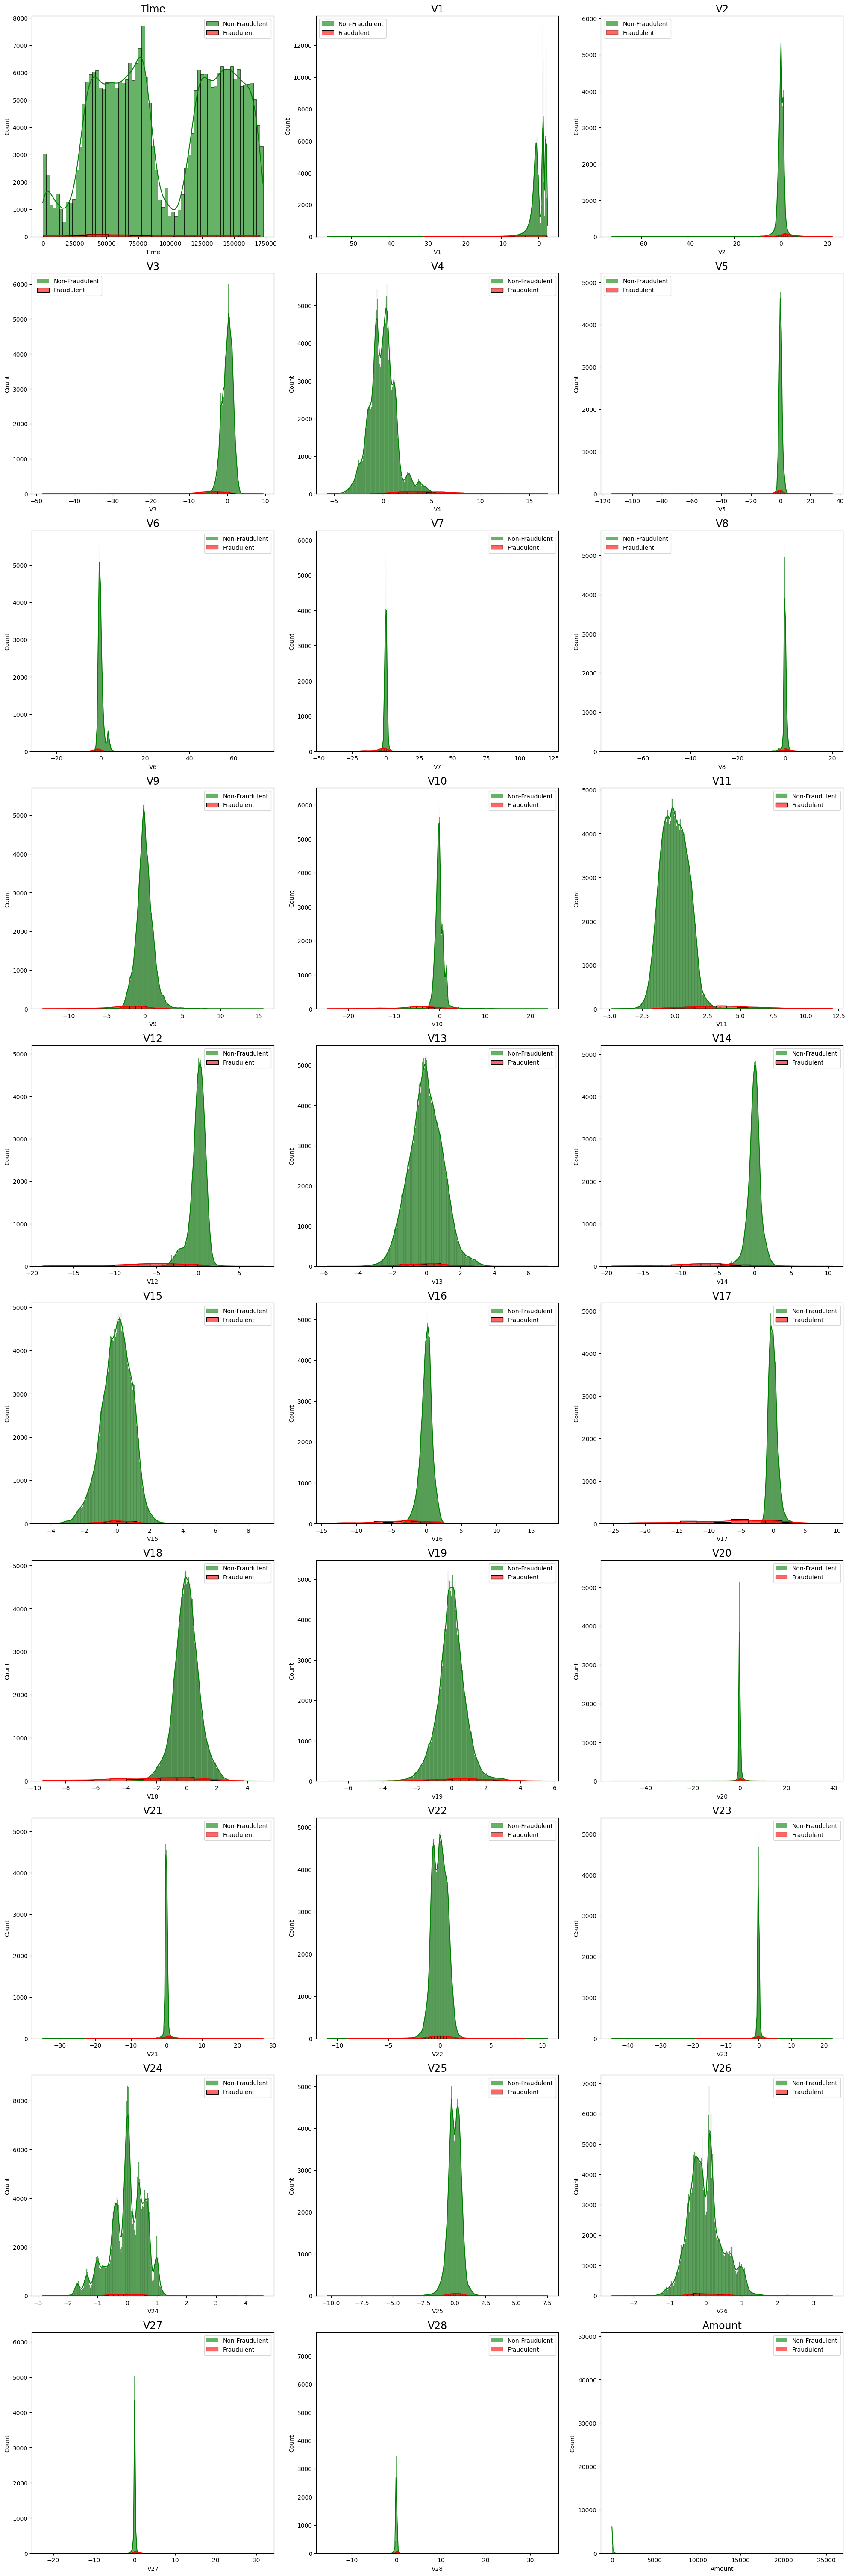

In [11]:
# plot the histogram of a variable from the dataset to see the skewness# plot the histogram of a variable from the dataset to see the skewness
import matplotlib.pyplot as plt
import seaborn as sns

# Identify normal and fraudulent records
normal_records = df["Class"] == 0
fraud_records = df["Class"] == 1

# Get all column names (excluding 'Class')
cols = list(df.columns)
cols.remove("Class")  # Exclude 'Class' column from plotting

# Set figure size dynamically based on the number of columns
rows = (len(cols) // 3) + 1  # Adjust number of rows for subplots
plt.figure(figsize=(20, rows * 6))

# Loop through each column and plot histogram
for n, col in enumerate(cols):
    plt.subplot(rows, 3, n + 1)
    sns.histplot(df[col][normal_records], color='green', kde=True, label='Non-Fraudulent', alpha=0.6)
    sns.histplot(df[col][fraud_records], color='red', kde=True, label='Fraudulent', alpha=0.6)

    plt.title(col, fontsize=12)
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



Observed Skew in the Amount.
### Feature scaling
- Drop original Amount and Time columns
- Splitting data into features and labels
- Handling class imbalance using SMOTE


In [5]:
# Feature scaling
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_Scaled'] = scaler.fit_transform(df[['Time']])

# Drop original Amount and Time columns
df.drop(columns=['Amount', 'Time'], inplace=True)

# Splitting data into features and labels
X = df.drop(columns=['Class'])
y = df['Class']

# Handling class imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

### Splitting the data into train & test data

In [14]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [15]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
113639
28518


### Plotting the distribution of a variable

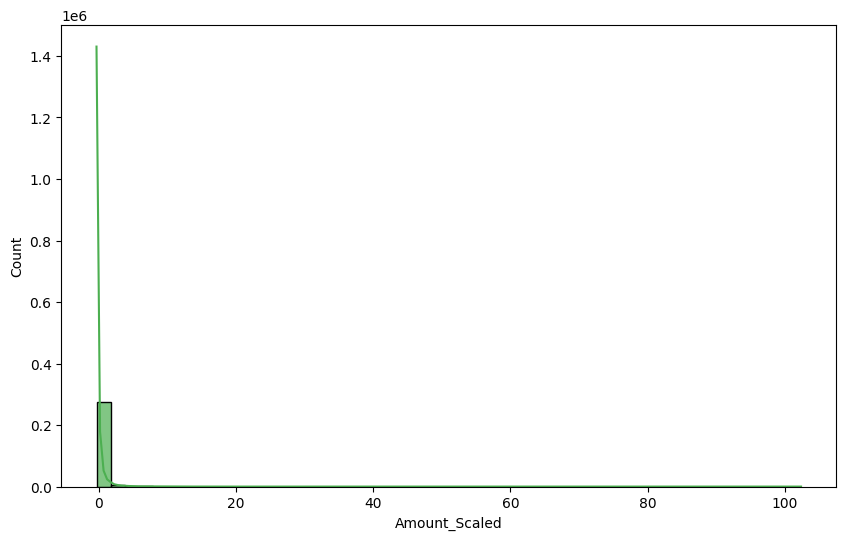

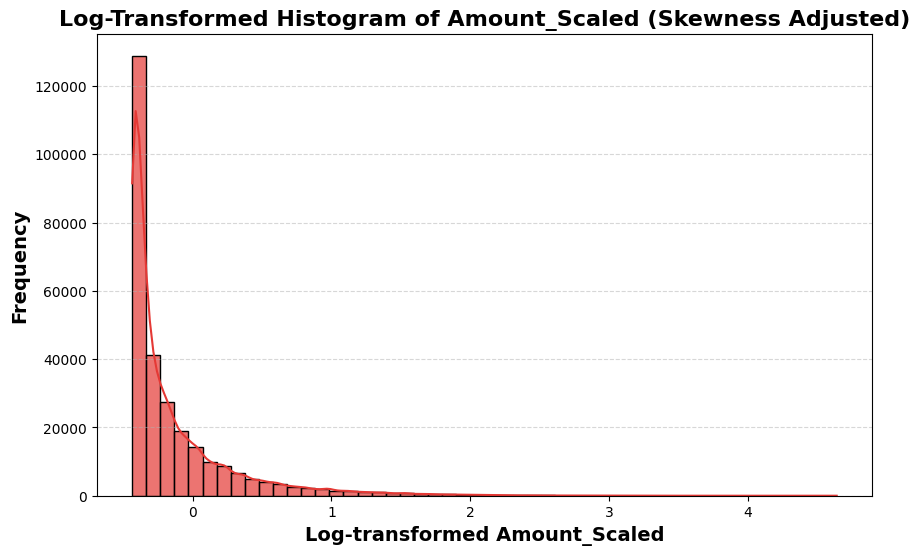

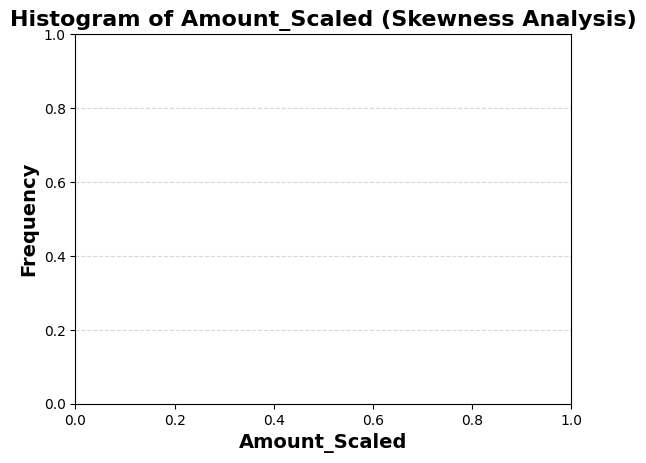

Skewness of Amount_Scaled: 16.98


In [57]:
# plot the histogram of a variable from the dataset to see the skewness
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select the variable to analyze
variable = "Amount_Scaled"  # Change this to any other column to analyze skewness

# Create figure
plt.figure(figsize=(10, 6))

# Plot histogram with KDE (density curve)
sns.histplot(df[variable], bins=50, kde=True, color="#4CAF50", edgecolor="black", alpha=0.7)

# Log transformation option (if the data is highly skewed)
if df[variable].skew() > 1:
    plt.figure(figsize=(10, 6))
    sns.histplot(np.log1p(df[variable]), bins=50, kde=True, color="#E53935", edgecolor="black", alpha=0.7)
    plt.xlabel(f"Log-transformed {variable}", fontsize=14, fontweight="bold")
    plt.ylabel("Frequency", fontsize=14, fontweight="bold")
    plt.title(f"Log-Transformed Histogram of {variable} (Skewness Adjusted)", fontsize=16, fontweight="bold")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

# Labels and title
plt.xlabel(variable, fontsize=14, fontweight="bold")
plt.ylabel("Frequency", fontsize=14, fontweight="bold")
plt.title(f"Histogram of {variable} (Skewness Analysis)", fontsize=16, fontweight="bold")

# Grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()

# Print skewness value
print(f"Skewness of {variable}: {df[variable].skew():.2f}")


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [16]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer

# Initialize PowerTransformer
power_transformer = PowerTransformer(copy=False)

# Fit and transform the training data
X_train = power_transformer.fit_transform(X_train)

# Transform the test data using the same transformation
X_test = power_transformer.transform(X_test)

# Print confirmation
print("Power Transformation applied successfully!")


Power Transformation applied successfully!


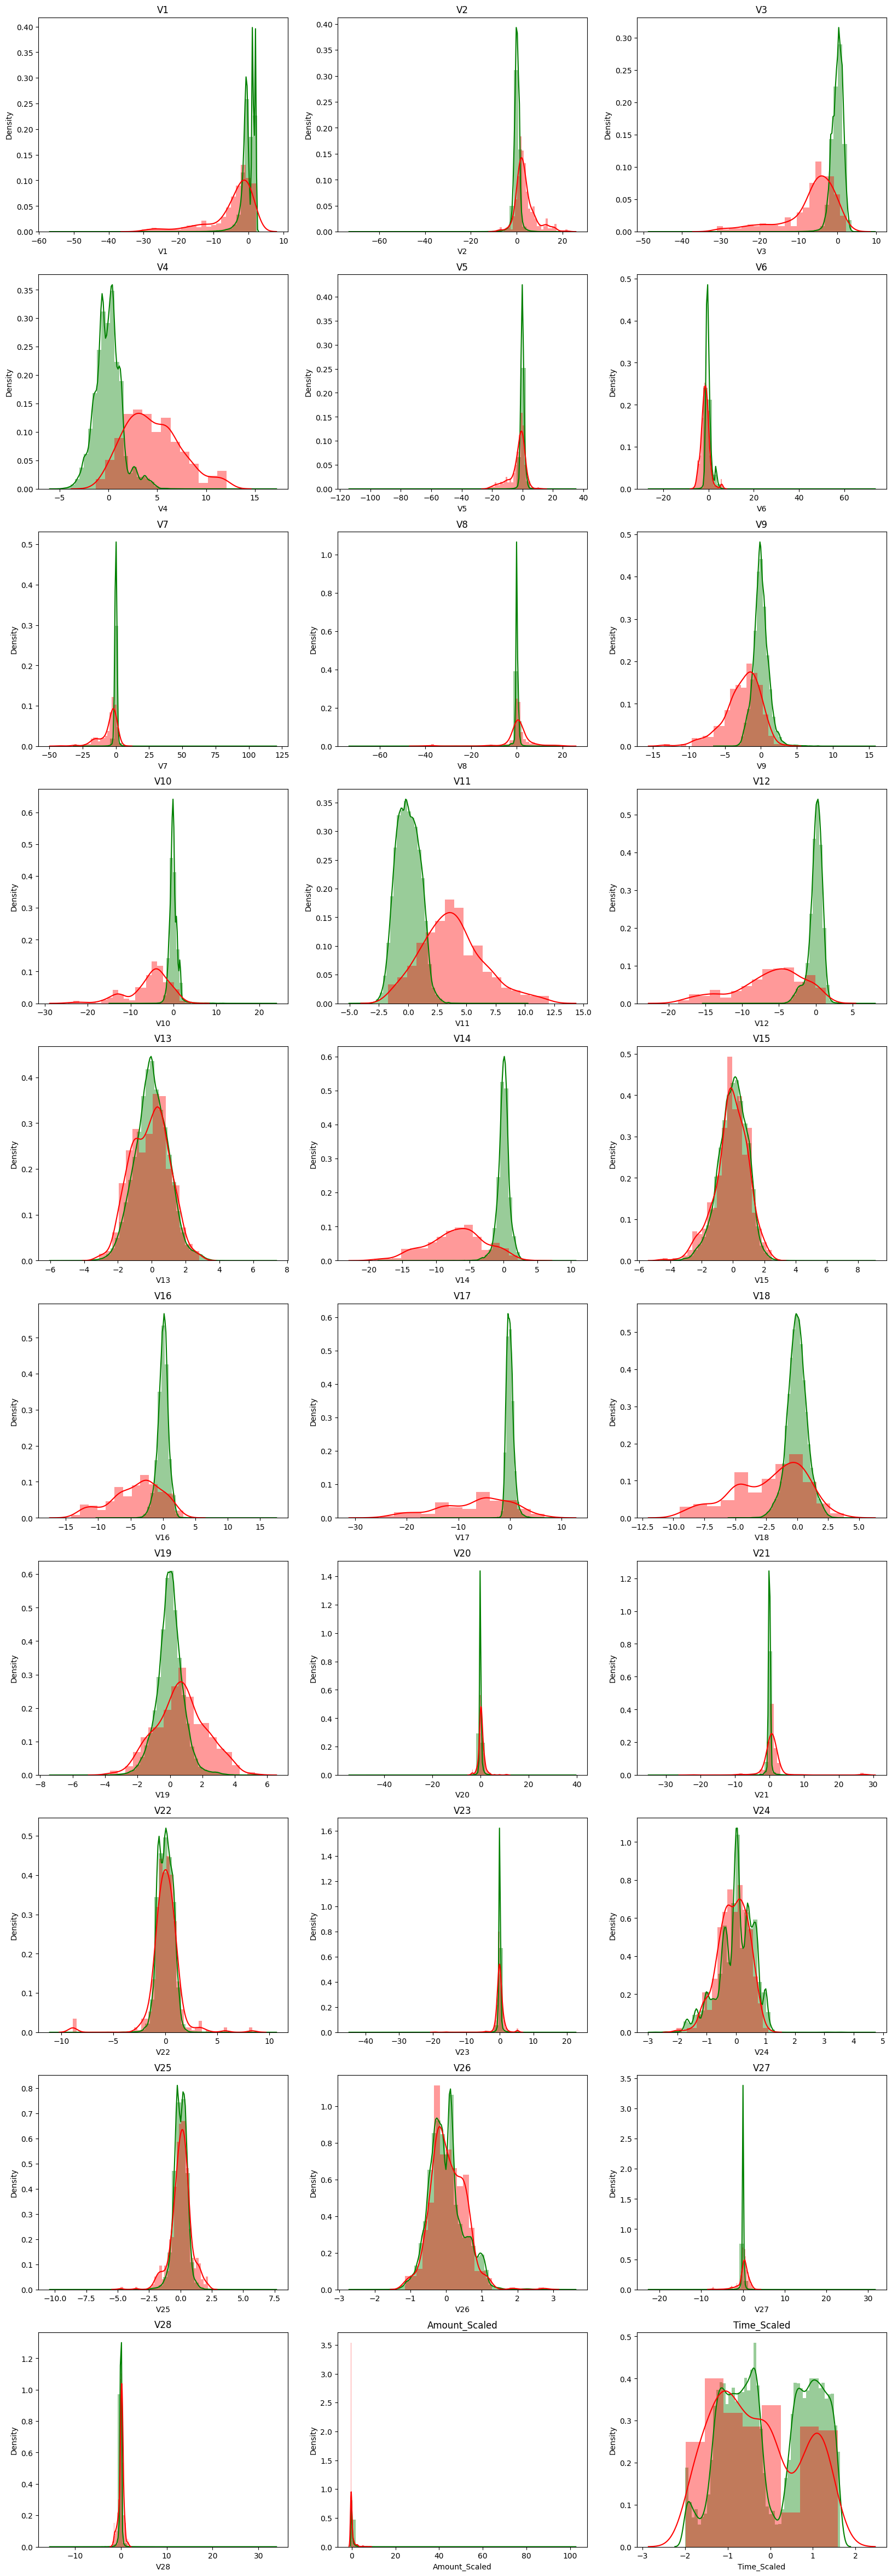

In [17]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1
cols = list(X.columns.values)
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=12)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = ______  #--> list of values
cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv
- y_train_cv
- y_test_cv

In [ ]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

KNN

SVM

Decicion Tree

Random Forest

XG Boost

#### Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
clf = ___  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
print --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model Building
- Build different models on the balanced dataset and see the result

## Model Evaluation

In [19]:
# Model evaluation function
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nModel Performance for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

In [20]:
# Logistic Regression
from sklearn import linear_model #import the package

## num_C = ______  #--> list of values
## cv_num =   #--> list of values
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Evaluate Logistic Regression
print("\nLogistic Regression Model Evaluation:")
evaluate_model(y_test, y_pred_log, "Logistic Regression")


Logistic Regression Model Evaluation:

Model Performance for Logistic Regression:
Accuracy: 0.9623
Precision: 0.9700
Recall: 0.9155
F1 Score: 0.9419
ROC-AUC Score: 0.9506

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     56777
           1       0.97      0.92      0.94     28518

    accuracy                           0.96     85295
   macro avg       0.96      0.95      0.96     85295
weighted avg       0.96      0.96      0.96     85295



## Evaluate Random Forest

In [21]:
# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate Random Forest
print("\nRandom Forest Model Evaluation:")
evaluate_model(y_test, y_pred_rf, "Random Forest")



Random Forest Model Evaluation:

Model Performance for Random Forest:
Accuracy: 0.9998
Precision: 0.9996
Recall: 0.9999
F1 Score: 0.9998
ROC-AUC Score: 0.9999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56777
           1       1.00      1.00      1.00     28518

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295



# Evaluate XGBoost

In [22]:
# Train XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate XGBoost
print("\nXGBoost Model Evaluation:")
evaluate_model(y_test, y_pred_xgb, "XGBoost")




XGBoost Model Evaluation:

Model Performance for XGBoost:
Accuracy: 0.9996
Precision: 0.9987
Recall: 1.0000
F1 Score: 0.9994
ROC-AUC Score: 0.9997

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56777
           1       1.00      1.00      1.00     28518

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295



# Confusion matrix for the best model (assuming XGBoost performs best)

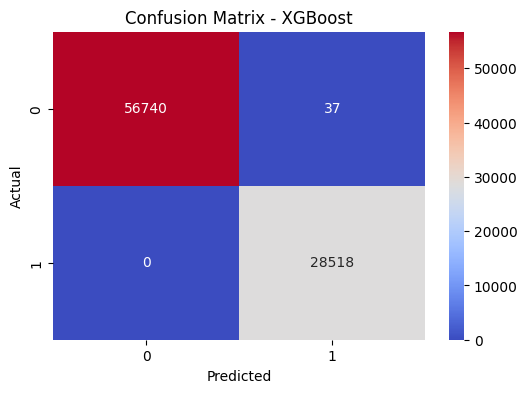

In [23]:
# Confusion matrix for the best model (assuming XGBoost performs best)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Evaluate ALL models

In [26]:
# Model evaluation function
def evaluate_models(y_test, y_pred, y_prob, model_name):
    print(f"\nModel Performance for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    return roc_auc


Model Performance for Logistic Regression:
Accuracy: 0.9623
Precision: 0.9700
Recall: 0.9155
F1 Score: 0.9419
ROC-AUC Score: 0.9895

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     56777
           1       0.97      0.92      0.94     28518

    accuracy                           0.96     85295
   macro avg       0.96      0.95      0.96     85295
weighted avg       0.96      0.96      0.96     85295


Model Performance for Random Forest:
Accuracy: 0.9998
Precision: 0.9996
Recall: 0.9999
F1 Score: 0.9998
ROC-AUC Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56777
           1       1.00      1.00      1.00     28518

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295


Model Performance for XGBoost:
Accura

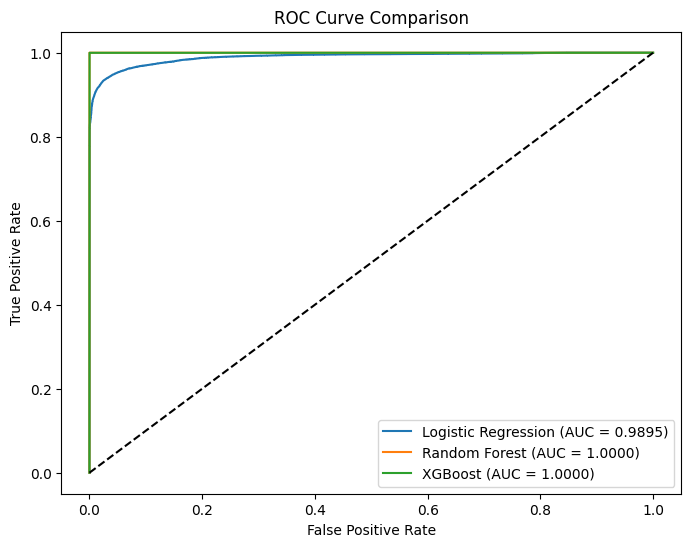


Conclusion:
- Logistic Regression provides a baseline model but may not handle complex patterns well.
- Random Forest improves performance by handling non-linearity and interactions.
- XGBoost often outperforms other models due to its advanced boosting technique and feature selection capabilities.
- Based on ROC-AUC scores, the model with the highest AUC is the best at distinguishing fraudulent transactions.


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
# Logistic Regression
y_prob_log = log_reg.predict_proba(X_test)[:, 1]
#  Random Forest
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
#  XGBoost
y_prob_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# Evaluate models
roc_auc_log = evaluate_models(y_test, y_pred_log, y_prob_log, "Logistic Regression")
roc_auc_rf = evaluate_models(y_test, y_pred_rf, y_prob_rf, "Random Forest")
roc_auc_xgb = evaluate_models(y_test, y_pred_xgb, y_prob_xgb, "XGBoost")
# Model Analysis and determine best model
# Compare models using ROC curve
plt.figure(figsize=(8, 6))
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


# Conclusion
print("\nConclusion:")
print("- Logistic Regression provides a baseline model but may not handle complex patterns well.")
print("- Random Forest improves performance by handling non-linearity and interactions.")
print("- XGBoost often outperforms other models due to its advanced boosting technique and feature selection capabilities.")
print("- Based on ROC-AUC scores, the model with the highest AUC is the best at distinguishing fraudulent transactions.")

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv
- y_train_cv
- y_test_cv

### Random Oversampling

In [ ]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


### Print the class distribution after applying SMOTE

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

# Performing Class balancing Analysis
## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

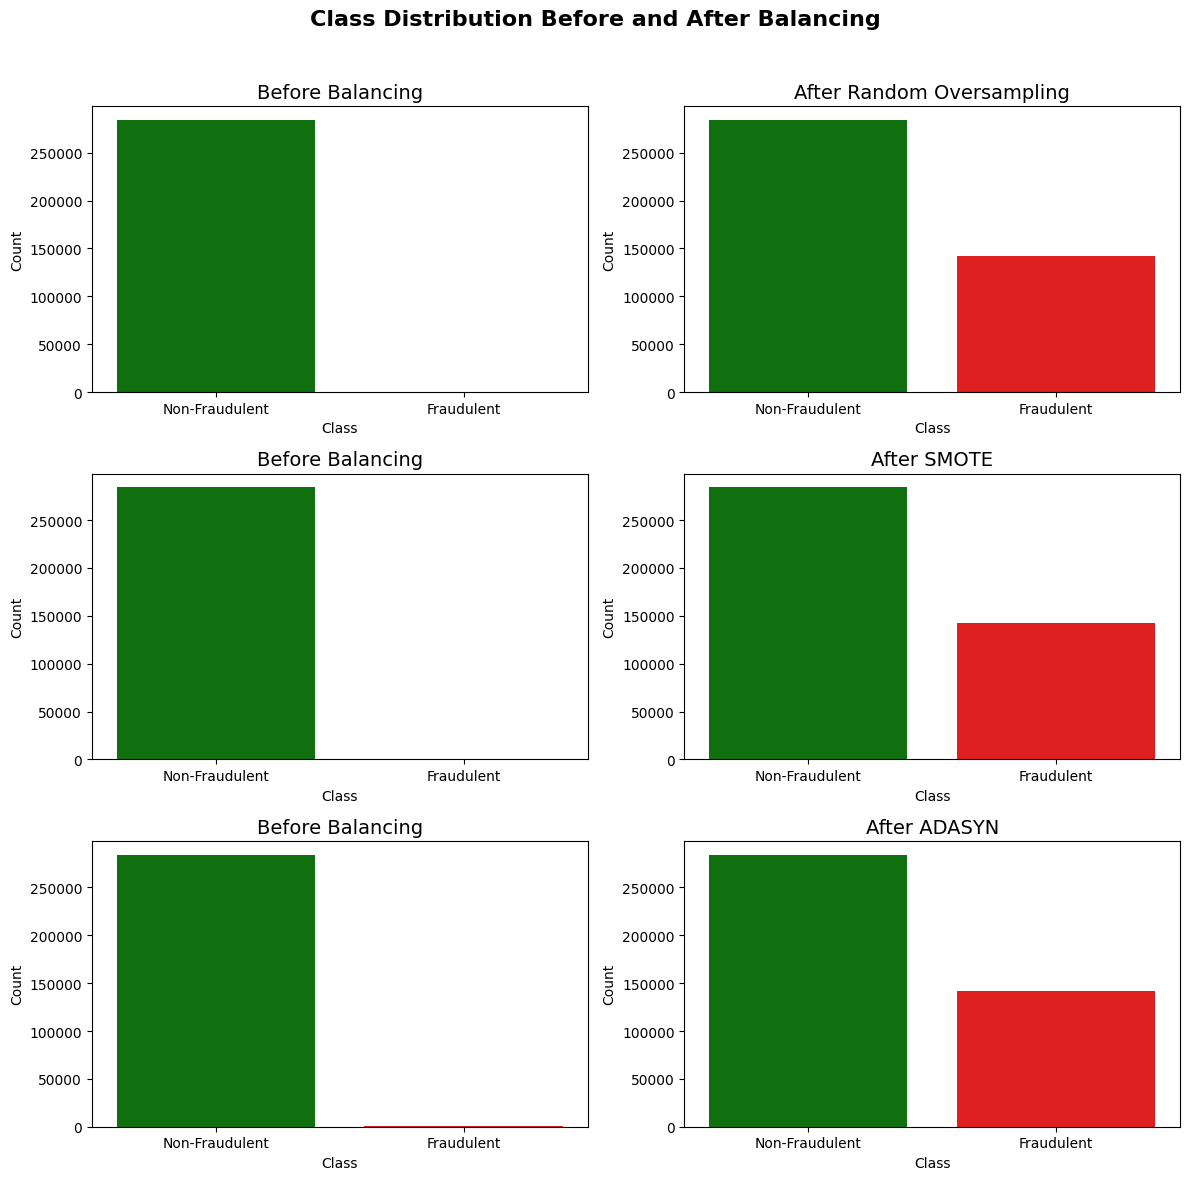

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Separate features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Define sampling strategies
sampling_strategy = 0.5  # Set minority class to 50% of majority class

# Apply Class Balancing Methods
random_oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_random, y_random = random_oversampler.fit_resample(X, y)

smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

adasyn = ADASYN(sampling_strategy=sampling_strategy, random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Function to visualize class distribution
def plot_class_distribution(y_original, y_resampled, method_name, ax):
    class_counts_original = y_original.value_counts()
    class_counts_resampled = y_resampled.value_counts()

    sns.barplot(x=class_counts_original.index, y=class_counts_original.values, ax=ax[0], palette=['green', 'red'])
    ax[0].set_title("Before Balancing", fontsize=14)
    ax[0].set_xlabel("Class")
    ax[0].set_ylabel("Count")
    ax[0].set_xticklabels(['Non-Fraudulent', 'Fraudulent'])

    sns.barplot(x=class_counts_resampled.index, y=class_counts_resampled.values, ax=ax[1], palette=['green', 'red'])
    ax[1].set_title(f"After {method_name}", fontsize=14)
    ax[1].set_xlabel("Class")
    ax[1].set_ylabel("Count")
    ax[1].set_xticklabels(['Non-Fraudulent', 'Fraudulent'])

    plt.tight_layout()

# Plot distributions
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

plot_class_distribution(y, y_random, "Random Oversampling", axes[0])
plot_class_distribution(y, y_smote, "SMOTE", axes[1])
plot_class_distribution(y, y_adasyn, "ADASYN", axes[2])

plt.suptitle("Class Distribution Before and After Balancing", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Validate data after class balancing

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [11]:
# Choose a balanced dataset (e.g., X_smote, X_random, X_adasyn)
X_balanced = X_smote
y_balanced = y_smote

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Define models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5)
    #"SVM": SVC(probability=True, kernel='rbf', random_state=42),
    #"Decision Tree": DecisionTreeClassifier(random_state=42),
    #"Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    #"XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict labels
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # Get probability scores

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    # Store results
    results.append([name, accuracy, precision, recall, f1, roc_auc])

    # Print classification report
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))


=== KNN ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56777
           1       0.99      1.00      1.00     28518

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295



In [16]:
# Choose a balanced dataset (e.g., X_smote, X_random, X_adasyn)
X_balanced = X_smote
y_balanced = y_smote

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Define models
models = {
    #"KNN": KNeighborsClassifier(n_neighbors=5),
    #"SVM": SVC(probability=True, kernel='rbf', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    #"Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    #"XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Store results
#results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict labels
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # Get probability scores

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    # Store results
    results.append([name, accuracy, precision, recall, f1, roc_auc])

    # Print classification report
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))




=== Decision Tree ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56777
           1       1.00      1.00      1.00     28518

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295



In [13]:
# Choose a balanced dataset (e.g., X_smote, X_random, X_adasyn)
X_balanced = X_smote
y_balanced = y_smote

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Define models
models = {
    #"KNN": KNeighborsClassifier(n_neighbors=5),
    #"SVM": SVC(probability=True, kernel='rbf', random_state=42),
    #"Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    #"XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Store results
#results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict labels
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # Get probability scores

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    # Store results
    results.append([name, accuracy, precision, recall, f1, roc_auc])

    # Print classification report
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))



=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56777
           1       1.00      1.00      1.00     28518

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295



In [12]:
# Choose a balanced dataset (e.g., X_smote, X_random, X_adasyn)
X_balanced = X_smote
y_balanced = y_smote

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Define models
models = {
    #"KNN": KNeighborsClassifier(n_neighbors=5),
    #"SVM": SVC(probability=True, kernel='rbf', random_state=42),
    #"Decision Tree": DecisionTreeClassifier(random_state=42),
    #"Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Store results
#results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict labels
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # Get probability scores

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    # Store results
    results.append([name, accuracy, precision, recall, f1, roc_auc])

    # Print classification report
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))




=== XGBoost ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56777
           1       1.00      1.00      1.00     28518

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295



In [17]:
# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"])

# Display results table
print("\nModel Performance Comparison:")
print(results_df)



Model Performance Comparison:
           Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0            KNN  0.998183   0.994594  1.000000  0.997290  0.999604
1        XGBoost  0.999801   0.999404  1.000000  0.999702  0.999991
2  Random Forest  0.999859   0.999720  0.999860  0.999790  0.999996
3  Decision Tree  0.997561   0.995103  0.997616  0.996358  0.997575


# Visualize Model Performance

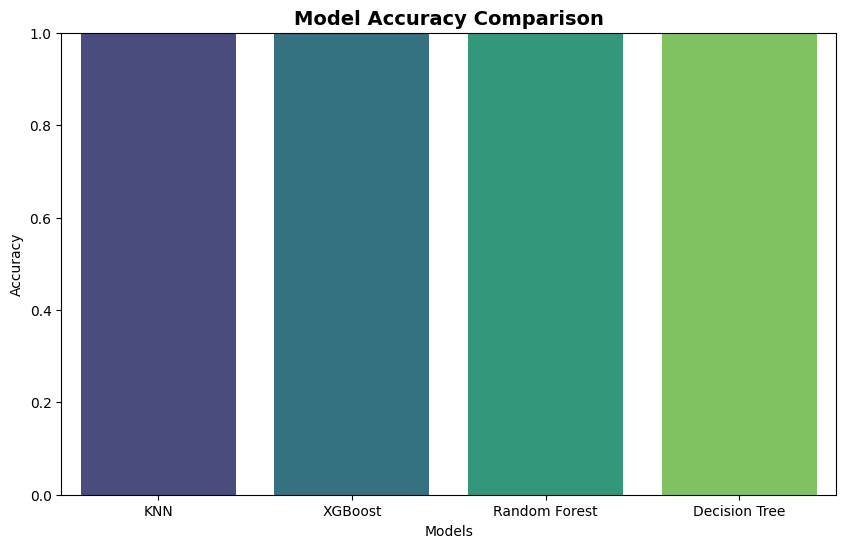

In [18]:
# Plot model performance metrics
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0, 1)
plt.show()
